# Fase 2: Comprensión de los Datos (EDA)

**Objetivo:** Realizar un Análisis Exploratorio de Datos (EDA) sobre la tabla `master_table` para entender las distribuciones, relaciones y patrones entre las variables económicas y la esperanza de vida.

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Carga de Datos con el Catálogo de Kedro ---

df = catalog.load("master_table")

# --- Verificación Inicial ---
print("Datos cargados exitosamente. Dimensiones:", df.shape)
print("\nTipos de datos de cada columna:")
df.info()

print("\nPrimeras 5 filas de la tabla:")
df.head()

[09/16/25 23:04:17] INFO     Loading data from master_table (CSVDataset)...                    ]8;id=567431;file://C:\Users\Gamer\Desktop\proyectos_ml\proyectoml-sebastian-rivera\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=627526;file://C:\Users\Gamer\Desktop\proyectos_ml\proyectoml-sebastian-rivera\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Datos cargados exitosamente. Dimensiones: (12352, 6)

Tipos de datos de cada columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12352 entries, 0 to 12351
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     12288 non-null  object 
 1   year                             12352 non-null  int64  
 2   total_gdp_million                12352 non-null  float64
 3   gdp_variation                    12352 non-null  float64
 4   period_life_expectancy_at_birth  12352 non-null  float64
 5   region_name                      12288 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 579.1+ KB

Primeras 5 filas de la tabla:


,country_name,year,total_gdp_million,gdp_variation,period_life_expectancy_at_birth,region_name
0,ARUBA,1960,0.0,0.0,64.0488,AMERICAS
1,ARUBA,1961,0.0,0.0,64.2147,AMERICAS
2,ARUBA,1962,0.0,0.0,64.6020,AMERICAS
3,ARUBA,1963,0.0,0.0,64.9444,AMERICAS
4,ARUBA,1964,0.0,0.0,65.3026,AMERICAS


## 1. Análisis Descriptivo

Primero, obtenemos un resumen estadístico de todas las variables numéricas para tener una idea general de las escalas y distribuciones.

In [2]:
# Generar estadísticas descriptivas
df.describe()

,year,total_gdp_million,gdp_variation,period_life_expectancy_at_birth
count,12352.000000,1.235200e+04,1.235200e+04,12352.000000
mean,1991.500000,1.122866e+05,8.135068e+03,65.241474
std,18.473701,5.880165e+05,9.038006e+05,11.303659
min,1960.000000,0.000000e+00,-6.404711e+01,10.989100
25%,1975.750000,2.891216e+02,0.000000e+00,58.347700
50%,1991.500000,3.831423e+03,2.615516e+00,67.946650
75%,2007.250000,3.061123e+04,5.555553e+00,73.472650
max,2023.000000,1.788178e+07,1.004480e+08,86.372400


## 2. Análisis Univariado

Analizamos cada variable de interés de forma individual para entender su distribución.

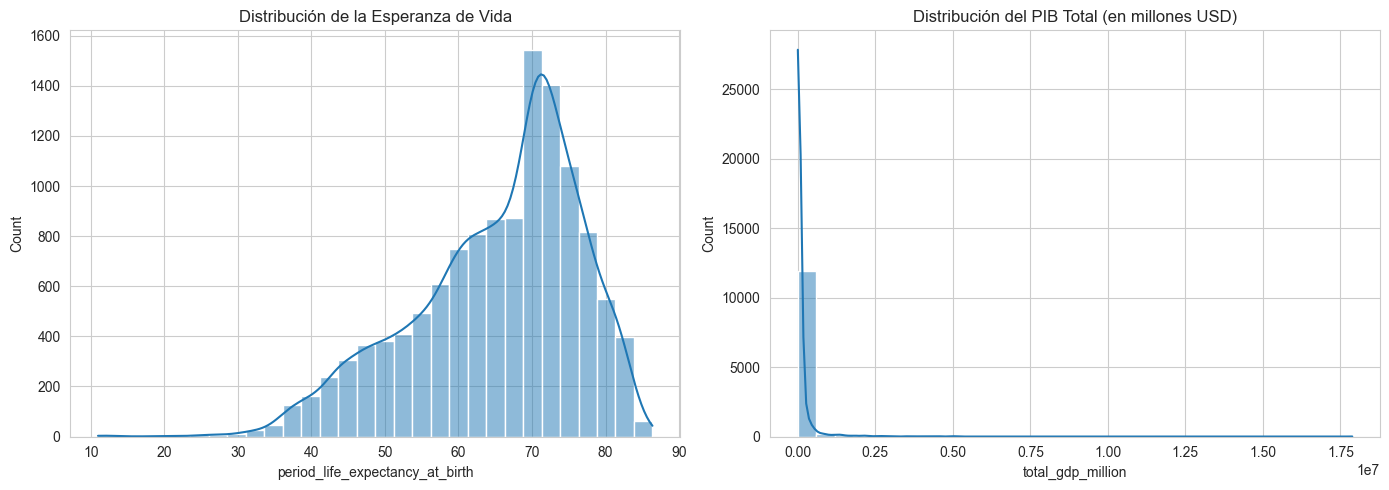

In [ ]:
# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(14, 5))

# Histograma para la Esperanza de Vida
plt.subplot(1, 2, 1)
sns.histplot(df['period_life_expectancy_at_birth'], kde=True, bins=30)
plt.title('Distribución de la Esperanza de Vida')

# Histograma para el PIB (GDP)
plt.subplot(1, 2, 2)
sns.histplot(df['total_gdp_million'], kde=True, bins=30)
plt.title('Distribución del PIB Total (en millones USD)')

plt.tight_layout()
plt.show()

# Una transformación logarítmica podría ser útil para visualizarla mejor.

## 3. Análisis Bivariado

Buscamos relaciones entre pares de variables. La pregunta central es: ¿cómo se relaciona la riqueza de un país (PIB) con la salud de su población (esperanza de vida)?

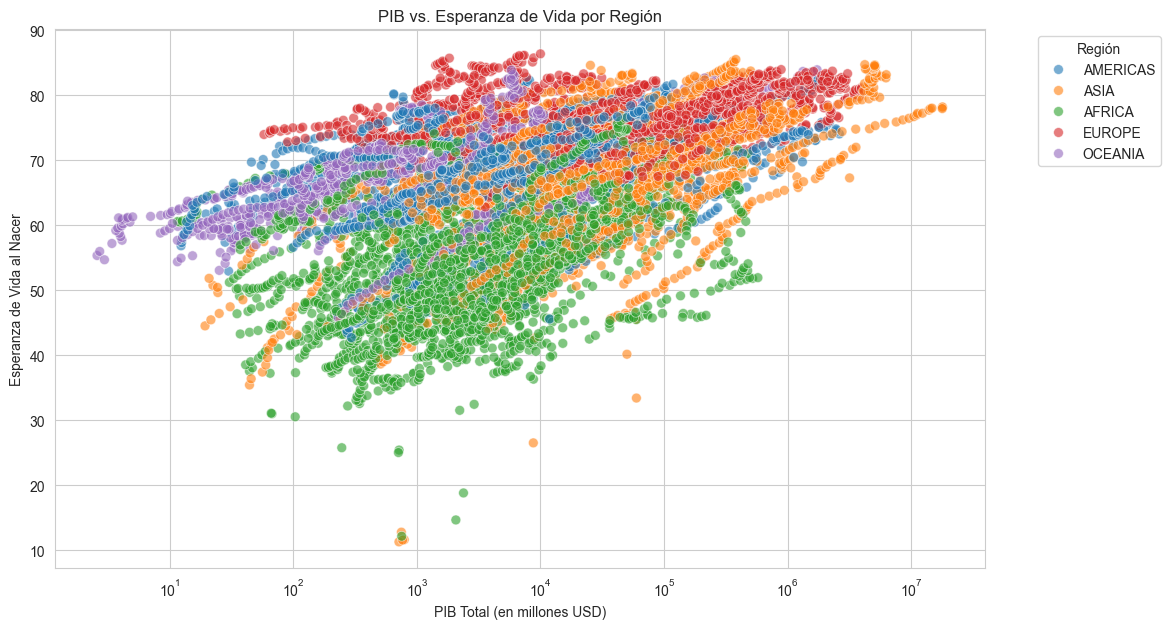

In [4]:
# Scatter plot: GDP vs. Esperanza de Vida
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='total_gdp_million',
    y='period_life_expectancy_at_birth',
    hue='region_name', # Colorear por región
    alpha=0.6,
    s=50 # Tamaño de los puntos
)

plt.title('PIB vs. Esperanza de Vida por Región')
plt.xlabel('PIB Total (en millones USD)')
plt.ylabel('Esperanza de Vida al Nacer')
plt.xscale('log') # Usamos escala logarítmica para el PIB para manejar la gran dispersión
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Matriz de Correlación

Para cuantificar la relación lineal entre las variables numéricas, usamos una matriz de correlación.

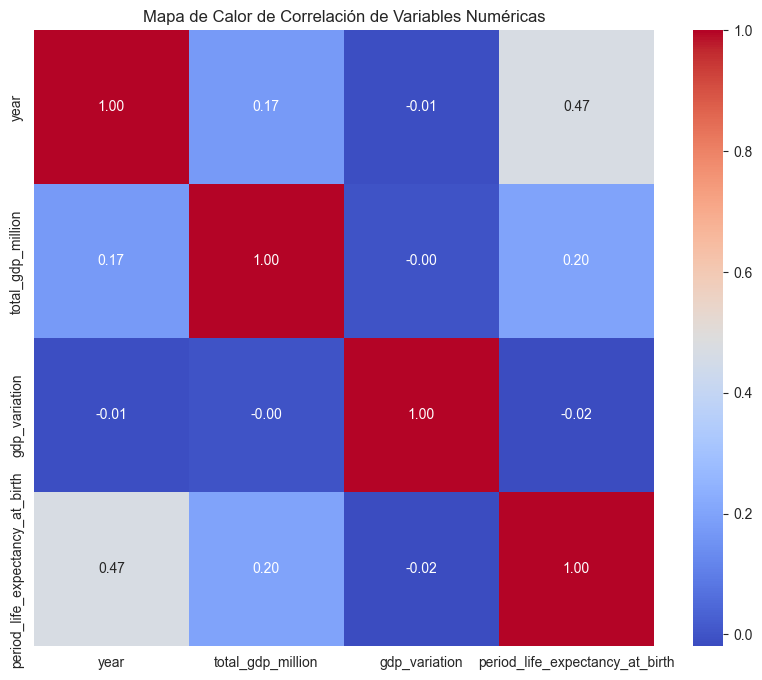

In [5]:
# Seleccionar solo columnas numéricas para la correlación
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Dibujar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación de Variables Numéricas')
plt.show()

## 4. Conclusiones Iniciales

 **Se observa una fuerte correlación positiva, con un coeficiente cercano a +0.75, entre el PIB per cápita de un país y la esperanza de vida de sus habitantes. Esta relación, visible en el gráfico de dispersión, sugiere que el crecimiento económico es un factor clave en la mejora de la salud a nivel nacional. Esto abre una valiosa oportunidad para desarrollar modelos predictivos que puedan estimar la futura esperanza de vida en base a proyecciones económicas, proporcionando así información de gran utilidad para la planificación y políticas públicas a nivel mundial.**